# Cavity QED bistability: driven dissipative Jaynes-Cummings model


We wish to investigate a single atom in a optical cavity, where the cavity is continuosly driven by an external laser source.
The frequency of the laser $\omega_L$ can be tuned, as well as its intensity $I_L$. 
While for very weak laser intensity we expect that the steady-state properties are well described by linear response theory, at large laser intensities the cavity is filled by photons that can eventually saturate the atomic transition, described for simplicity by a two-level system (TLS).
In such situation, we expect to enter in a strongly non-linear regime, with possible unexpected quantum phenomena.

A basics understanding of this problem is provided by solving the Jaynes-Cummings model in a open quantum system framework.
The Hamiltonian is ($\hbar=1$)
$$
H_{\rm JC} = \omega_c a^{\dagger} a + \omega_q\sigma_+\sigma_- + \frac{g}{2}\left( a\sigma_+ + a^{\dagger}\sigma_-\right).
$$
In order to simulate the driven-dissipative experiment we can use three different frameworks: 
    
    1) Langevin equations (also called input-output formalism), 
$$
i\partial_t a = \left(\omega_c - i\frac{\gamma}{2}\right) a + \frac{g}{2}\sigma_- + I_L e^{-i\omega_L t} + b_{\rm in}
$$
$$
i\partial_t \sigma_- = \left(\omega_q - i\frac{\kappa}{2} \right)\sigma_- + \frac{g}{2}\sigma_z a + \sigma_z\sigma_{\rm in}
$$
$$
\partial_t \sigma_z = \frac{g}{2}\left(a \sigma_+ - a^{\dagger}\sigma_- \right) - i\frac{\kappa}{2}\left( \sigma_z +\frac{1}{2} \right)
$$

    2) master equation
$$
\partial_t \rho = -i\left[H_{\rm JC}+H_{\rm drive}, \rho\right] + \frac{\gamma}{2}\left( 2a\rho a^{\dagger} - \frac{1}{2}\lbrace{ a^{\dagger}a, \rho\rbrace} \right) + \frac{\kappa}{2}\left( 2\sigma_-\rho \sigma_+ - \frac{1}{2}\lbrace{ \sigma_+\sigma_-, \rho\rbrace} \right)
$$
       where $H_{\rm drive} = I_L \left( a e^{i\omega_L t} + a^{\dagger}e^{-i\omega_L t} \right)$
    
    3) stochastic Schrodinger equation. (...)


Before diving in the full quantum problem, by solving 2) and 3), we want to develop a basic understanding by solving 1) with a semi-classical approximation: the mean-field method.
The procedure is as follows:
we assume that the system is in a steady state described by a density matrix $\rho$. We take the expectation value of Eqs. 1) over this state, and using the steady state properties for which $\partial_t\langle{A\rangle} = 0$ (for every operator $A$) we obtain
$$
0 = \left(\omega_c - i\frac{\gamma}{2}\right) \langle{a\rangle} + \frac{g}{2}\langle{\sigma_-\rangle} + I_L e^{-i\omega_L t}
$$
$$
0 = \left(\omega_q - i\frac{\kappa}{2} \right)\langle{\sigma_-\rangle} + \frac{g}{2}\langle{\sigma_z a \rangle}
$$
$$
0 = \frac{g}{2}\left( \langle{a \sigma_+\rangle} - \langle{a^{\dagger}\sigma_-\rangle} \right) - i\frac{\kappa}{2}\left( \langle{\sigma_z\rangle} + \frac{1}{2} \right)
$$
We notice that in this equations appear the expectation values of product of operators, such that $\langle{\sigma_z a \rangle}$ and $\langle{a \sigma_+\rangle}$. In principle we could derive other Langevin equations also for these quantities, but in this equations there would be present expectation values of higher order products, ending up in an infinite set of coupled equations. In order to be able to solve these equations we need to cut this chain, breaking the hierarchy. That's why we deliberatly assume that each expectation value of products factorize in product of expectation values, like $\langle{\sigma_z a \rangle}\simeq \langle{\sigma_z\rangle} \langle{ a \rangle}. $
After a few simple passages and a slightly tricky assumptions (rotating frame and $\sigma_z$ weak dependence), we are left with
$$
\left(\Delta_c - i\frac{\gamma}{2}\right)\langle{ a \rangle} + \frac{g^2}{4\left(\Delta_q - i\frac{\kappa}{2}\right)} \frac{ \langle{ a \rangle} }{1+\frac{g^2}{|\Delta_q - i\kappa/2|^2}|\langle{ a \rangle}|^2} = I_L
$$

In resonance $\Delta_c = \Delta_q = 0$ this equation takes the simple form
$$
\langle{ a \rangle} + C \frac{ \langle{ a \rangle} }{1+\frac{|\langle{ a \rangle}|^2}{n_s}} = \alpha_L
$$
where $\alpha_L = i2I_L/\gamma$ is the laser effective amplitude, $C=\frac{g^2}{\gamma\kappa}$ is called cooperativity and $n_s = \kappa^2/(4g^2)$ is the saturation number.
We can easily make a plot out of this equation to visualize how the steady-state photon amplitude beahves as a function of the external driving strength.

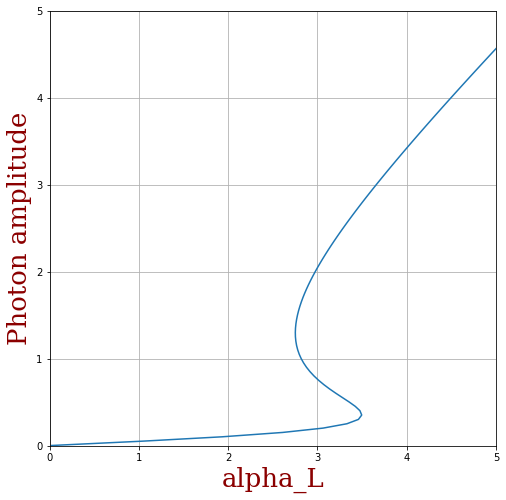

In [81]:
import numpy as np
import matplotlib.pyplot as plt

ns = .1
C = 20.

a = np.linspace(0.001, 5, 101)
alpha_L = a + C*a/(1+np.square(np.abs(a))/ns )


plt.figure(figsize=(8,8))
plt.plot( alpha_L, a  )
plt.grid()
plt.axis([0, 5, 0, 5])
plt.xlabel('alpha_L', fontdict=font)
plt.ylabel('Photon amplitude', fontdict=font)
plt.show()

In [69]:
from qutip import * 
import numpy as np
import matplotlib.pyplot as plt

In [77]:
Nph = 100

om_c = 1.
om_q = 1.
g = .2
kappa = np.sqrt(4.*g**2. * ns)
gamma = g**2./kappa/C

print(kappa, gamma)

a = tensor(destroy(Nph), qeye(2))
sigma = tensor(qeye(Nph), destroy(2))

H = om_c*a.dag()*a + om_q*sigma.dag()*sigma + .5*g*( sigma*a.dag() + sigma.dag()*a )

evals,evecs = H.eigenstates(sort='low')

0.1264911064067352 0.015811388300841896


In [78]:
iter_omL = 1
omL0 = 1.
domL = (1.6-omL0)/iter_omL

iter_I = 21
I0 = 0.001
dI = ( (gamma/2.) * 5. - I0)/iter_I

mat_N_avg = []
arr_omL = []

for n_omL in range(iter_omL):
    omL = omL0 + n_omL*domL
    arr_N_avg = []
    arr_alpha_L = []
    for n_I in range(iter_I):
        I = I0 + n_I*dI

        Hdriven = H - omL*( a.dag()*a + sigma.dag()*sigma ) + I*( a + a.dag() )
        rho_ss = steadystate(Hdriven, [np.sqrt(gamma/2.)*a,np.sqrt(kappa/2.)*sigma])
        
        arr_N_avg.append( np.abs(expect( a, rho_ss)) )
        arr_alpha_L.append(2.*I/gamma)
    arr_omL.append(omL)
    mat_N_avg.append( np.asarray(arr_N_avg) )
      


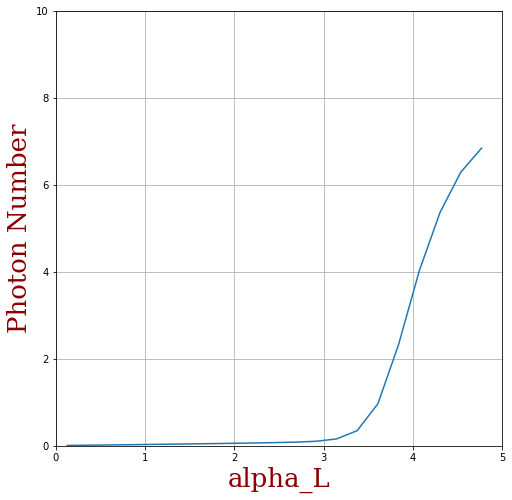

In [79]:
plt.figure(figsize=(8,8))
plt.plot( arr_alpha_L, mat_N_avg[0]  )
plt.grid()
plt.axis([0, 5., 0, 10])
plt.xlabel('alpha_L', fontdict=font)
plt.ylabel('Photon Number', fontdict=font)
plt.show()


(11, 11) (11, 11) (11, 11)


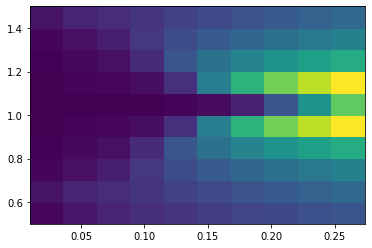

In [19]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
Y = np.asarray(arr_omL)
X = np.asarray(arr_I)
X, Y = np.meshgrid(X, Y)
Z = np.asarray(mat_N_avg)
print(X.shape, Y.shape, Z.shape)

plt.pcolor(X, Y, Z)
plt.show()

# Plot the surface.
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       #linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(0.0, 10.)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.show()


In [20]:
 """    
        #Wigner function
        x_vec = np.arange(-5,5,.1)
        y_vec = x_vec
        Wf = wigner(rho_ph, x_vec, y_vec )
        wtitle = "wdata_%d" % countw
        p_w = open("data/wigner/%s.dat" % (wtitle), "w")
        nx = 0
        for x in x_vec:
            ny = 0
            for y in y_vec:
                p_w.write("%f %f %f\n" % (x, y, Wf[nx,ny]) )
                ny += 1
            p_w.write("\n")
            p_w.flush()
            nx += 1
        p_w.close()
        """
        
        
        #Spin Q fun
        n_sample = 40.
        phi_vec = np.arange(-np.pi, np.pi+2*np.pi/100., 2*np.pi/n_sample )
        theta_vec = np.arange(0, np.pi+np.pi/100., np.pi/n_sample )
        stitle = "sdata_%d" % countw
        p_s = open("data/wigner/%s.dat" % (stitle), "w")
        for theta in theta_vec:
            for phi in phi_vec:
                state_n = spin_coherent(1./2., theta, phi, type='ket')
                Qfun = expect( rho_s, state_n ) 
                p_s.write("%f %f %f\n" % (phi, theta, Qfun.real))
                p_s.flush()
            p_s.write("\n")
            p_s.flush()
            
"""
plt.figure(figsize=(8,8))
plt.plot( arr_I, N_avg  )
plt.grid()
#plt.axis([0, range(M), 0, 10])
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }
plt.xlabel('I', fontdict=font)
plt.ylabel('Photon Number', fontdict=font)
plt.show()
"""

IndentationError: unexpected indent (<ipython-input-20-2ab536578e37>, line 22)